In [20]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import gym
import gym_anytrading

#Stable baselines  RL stuff

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C # the algo we will using

#Processing libraries
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 

In [22]:
df=pd.read_csv('/content/gmedata.csv')

In [23]:
df.head()

,Date,Open,High,Low,Close,Volume
0,03/12/2021,275.00,295.50,262.27,264.5,"25,845,900"
1,03/11/2021,241.64,281.50,232.60,260.0,"28,312,490"
2,03/10/2021,269.43,348.50,172.00,265.0,"71,570,570"
3,03/09/2021,217.71,249.85,208.51,246.9,"39,099,328"
4,03/08/2021,154.89,210.87,146.10,194.5,"63,565,621"


In [24]:
df.tail()

,Date,Open,High,Low,Close,Volume
246,03/20/2020,4.08,4.08,3.65,3.76,"7,722,194"
247,03/19/2020,3.71,4.20,3.55,4.19,"5,039,539"
248,03/18/2020,4.10,4.25,3.50,3.77,"3,651,709"
249,03/17/2020,4.40,4.65,4.11,4.23,"3,562,210"
250,03/16/2020,3.93,4.57,3.90,4.37,"4,866,696"


In [25]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [26]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

Convert Date Column to datetime

In [27]:
df["Date"]=pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [28]:
#Set the Date column as index 

df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-12,275.00,295.50,262.27,264.5,"25,845,900"
2021-03-11,241.64,281.50,232.60,260.0,"28,312,490"
2021-03-10,269.43,348.50,172.00,265.0,"71,570,570"
2021-03-09,217.71,249.85,208.51,246.9,"39,099,328"
2021-03-08,154.89,210.87,146.10,194.5,"63,565,621"


In [29]:
env=gym.make('stocks-v0',df=df,frame_bound=(5,100),window_size=5)

In [30]:
env.signal_features

array([[ 2.6450e+02,  0.0000e+00],
       [ 2.6000e+02, -4.5000e+00],
       [ 2.6500e+02,  5.0000e+00],
       [ 2.4690e+02, -1.8100e+01],
       [ 1.9450e+02, -5.2400e+01],
       [ 1.3774e+02, -5.6760e+01],
       [ 1.3235e+02, -5.3900e+00],
       [ 1.2418e+02, -8.1700e+00],
       [ 1.1818e+02, -6.0000e+00],
       [ 1.2040e+02,  2.2200e+00],
       [ 1.0174e+02, -1.8660e+01],
       [ 1.0873e+02,  6.9900e+00],
       [ 9.1710e+01, -1.7020e+01],
       [ 4.4970e+01, -4.6740e+01],
       [ 4.6000e+01,  1.0300e+00],
       [ 4.0590e+01, -5.4100e+00],
       [ 4.0690e+01,  1.0000e-01],
       [ 4.5940e+01,  5.2500e+00],
       [ 4.9510e+01,  3.5700e+00],
       [ 5.2400e+01,  2.8900e+00],
       [ 5.1100e+01, -1.3000e+00],
       [ 5.1200e+01,  1.0000e-01],
       [ 5.0310e+01, -8.9000e-01],
       [ 6.0000e+01,  9.6900e+00],
       [ 6.3770e+01,  3.7700e+00],
       [ 5.3500e+01, -1.0270e+01],
       [ 9.2410e+01,  3.8910e+01],
       [ 9.0000e+01, -2.4100e+00],
       [ 2.2500e+02,

Build Enviorment

In [31]:
env.action_space

Discrete(2)

info {'total_reward': -53.38, 'total_profit': 0.19074156922620766, 'position': 1}


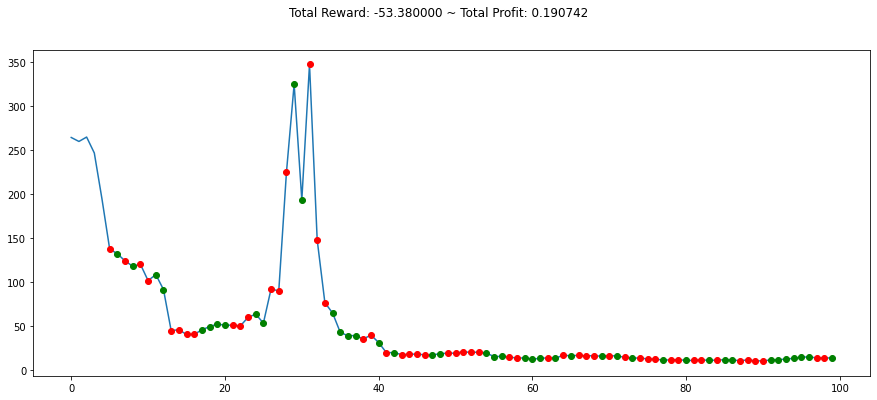

In [32]:
# Action :{ buy or sell}

state=env.reset()
while True:
    action =env.action_space.sample()
    n_state ,reward,done, info=env.step(action)
    if done:
        print('info',info)
        break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

Build Enviorment and Train

In [33]:
env_maker=lambda: gym.make('stocks-v0',df=df,frame_bound=(5,100),window_size=5)

env=DummyVecEnv([env_maker])

In [34]:
model=A2C('MlpLstmPolicy',env,verbose=1)
model.learn(total_timesteps=100000)

---------------------------------
| explained_variance | -0.0528  |
| fps                | 6        |
| nupdates           | 1        |
| policy_entropy     | 0.692    |
| total_timesteps    | 5        |
| value_loss         | 901      |
---------------------------------
---------------------------------
| explained_variance | -0.00124 |
| fps                | 225      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 5.34e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.0188   |
| fps                | 283      |
| nupdates           | 200      |
| policy_entropy     | 0.69     |
| total_timesteps    | 1000     |
| value_loss         | 0.122    |
---------------------------------
---------------------------------
| explained_variance | -0.032   |
| fps                | 308      |
| nupdates           | 300      |
| policy_entropy     | 0.69     |
| total_timest

Evaluation

info {'total_reward': 0.0, 'total_profit': 0.7944222506393862, 'position': 1}


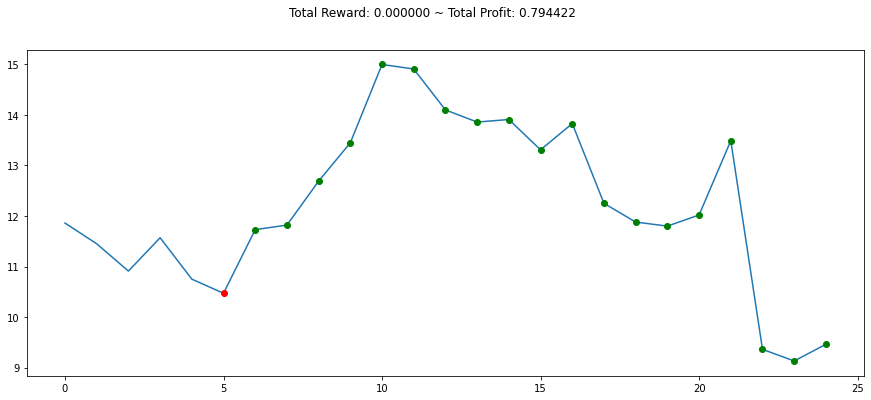

In [36]:
#Setting up the Agent Environment
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break


#Plotting our Model for Trained Trades
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()